# kerasデータ

Using TensorFlow backend.


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


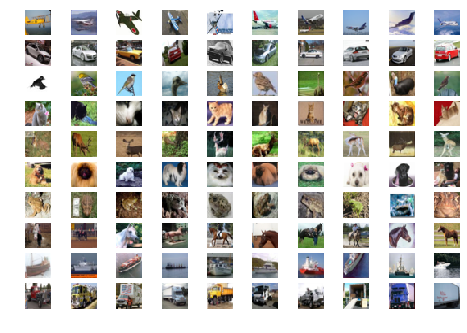

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
from keras.datasets import cifar10

if __name__ == '__main__':
    # CIFAR-10データセットをロード
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

    # 画像を描画
    nclasses = 10
    pos = 1
    for targetClass in range(nclasses):
        targetIdx = []
        # クラスclassIDの画像のインデックスリストを取得
        for i in range(len(y_train)):
            if y_train[i][0] == targetClass:
                targetIdx.append(i)

        # 各クラスからランダムに選んだ最初の10個の画像を描画
        np.random.shuffle(targetIdx)
        for idx in targetIdx[:10]:
            img = toimage(X_train[idx])
            plt.subplot(10, 10, pos)
            plt.imshow(img)
            plt.axis('off')
            pos += 1

    plt.show()

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_train[0].shape)
print(y_train)

(50000, 32, 32, 3)
(32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [11]:
print(X_train[0])
print(X_train[0].shape)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)


In [15]:
print(X_train[0]/255)

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


# chainerデータ


In [1]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install 'cupy-cuda80==4.0.0b4' 'chainer==4.0.0b4'
!pip install hyperopt==0.1
!pip install networkx==1.11

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libcusparse8.0 libnvrtc8.0 libnvtoolsext1
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 28.9 MB of archives.
After this operation, 71.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libcusparse8.0 amd64 8.0.61-1 [22.6 MB]
Get:2 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvrtc8.0 amd64 8.0.61-1 [6,225 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvtoolsext1 amd64 8.0.61-1 [32.2 kB]
Fetched 28.9 MB in 2s (10.3 MB/s)

78Selecting previously unselected package libcusparse8.0:amd64.
(Reading database ... 16712 files and directories currently installed.)
Preparing to unpack .../libcusparse8.0_8.0.61-1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [  6%] [###..

    100% |████████████████████████████████| 205.4MB 7.1kB/s 
    100% |████████████████████████████████| 378kB 3.2MB/s 
    100% |████████████████████████████████| 81kB 10.2MB/s 
  Running setup.py bdist_wheel for chainer ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/86/f6/d4/39d389d89011f1b9cc9b3bd59b773f063958c448d33b00f802
  Running setup.py bdist_wheel for filelock ... - done
  Stored in directory: /content/.cache/pip/wheels/5f/5e/8a/9f1eb481ffbfff95d5f550570c1dbeff3c1785c8383c12c62b
Successfully built chainer filelock
    100% |████████████████████████████████| 102kB 3.6MB/s 
    100% |████████████████████████████████| 163kB 3.8MB/s 
    100% |████████████████████████████████| 389kB 2.5MB/s 
  Running setup.py bdist_wheel for hyperopt ... - \ done
  Stored in directory: /content/.cache/pip/wheels/4b/0f/9d/1166e48523d3bf7478800f250b0fceae31ac6a08b8a7cca820
Successfully built hyperopt
    100% |████████████████████████████████| 1.3MB 970kB/s 
 

In [2]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#dataset
from chainer.datasets import get_cifar10
train, test = get_cifar10(withlabel=True)

def check(x):  
        print("shape:", x.shape)
        print("dtype:", x.dtype)
        print("ndim:", x.ndim)
        print("==========")

print("==========")
print("学習データ")
check(train[0][0])
print("ラベル", train[0][1])

学習データ
shape: (3, 32, 32)
dtype: float32
ndim: 3
ラベル 6


In [12]:
train[0][0].shape

(3, 32, 32)

self.train_iter = chainer.iterators.SerialIterator(train, self.batch_size)のオプションshuffleをTrueにするのはよくないんじゃない？？　公式サンプルもそんな使い方してない。

In [14]:
train[0][0].transpose()
np.transpose(train[0][0], axes=(1,2,0))


array([[[0.23137257, 0.24313727, 0.24705884],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607845, 0.18823531, 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352945],
        [0.59607846, 0.4901961 , 0.40000004],
        [0.5803922 , 0.48627454, 0.4039216 ]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235297, 0.34509805, 0.21568629],
        [0.4666667 , 0.3254902 , 0.19607845],
        [0.4784314 , 0.34117648, 0.22352943]],

       [[0.09803922, 0.09411766, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215688, 0.10588236, 0.03137255],
        ...,
        [0.46274513, 0.32941177, 0.19607845],
        [0.47058827, 0.32941177, 0.19607845],
        [0.427451  , 0.28627452, 0.16470589]],

       ...,

       [[0.81568635, 0.6666667 , 0.37647063],
        [0.78823537, 0.6       , 0.13333334],
        [0.77647066, 0

# chainer公式のサンプル

VGG定義

In [0]:
import chainer
import chainer.functions as F
import chainer.links as L


class Block(chainer.Chain):

    """A convolution, batch norm, ReLU block.
    A block in a feedforward network that performs a
    convolution followed by batch normalization followed
    by a ReLU activation.
    For the convolution operation, a square filter size is used.
    Args:
        out_channels (int): The number of output channels.
        ksize (int): The size of the filter is ksize x ksize.
        pad (int): The padding to use for the convolution.
    """

    def __init__(self, out_channels, ksize, pad=1):
        super(Block, self).__init__()
        with self.init_scope():
            self.conv = L.Convolution2D(None, out_channels, ksize, pad=pad,
                                        nobias=True)
            self.bn = L.BatchNormalization(out_channels)

    def __call__(self, x):
        h = self.conv(x)
        h = self.bn(h)
        return F.relu(h)


class VGG(chainer.Chain):

    """A VGG-style network for very small images.
    This model is based on the VGG-style model from
    http://torch.ch/blog/2015/07/30/cifar.html
    which is based on the network architecture from the paper:
    https://arxiv.org/pdf/1409.1556v6.pdf
    This model is intended to be used with either RGB or greyscale input
    images that are of size 32x32 pixels, such as those in the CIFAR10
    and CIFAR100 datasets.
    On CIFAR10, it achieves approximately 89% accuracy on the test set with
    no data augmentation.
    On CIFAR100, it achieves approximately 63% accuracy on the test set with
    no data augmentation.
    Args:
        class_labels (int): The number of class labels.
    """

    def __init__(self, class_labels=10):
        super(VGG, self).__init__()
        with self.init_scope():
            self.block1_1 = Block(64, 3)
            self.block1_2 = Block(64, 3)
            self.block2_1 = Block(128, 3)
            self.block2_2 = Block(128, 3)
            self.block3_1 = Block(256, 3)
            self.block3_2 = Block(256, 3)
            self.block3_3 = Block(256, 3)
            self.block4_1 = Block(512, 3)
            self.block4_2 = Block(512, 3)
            self.block4_3 = Block(512, 3)
            self.block5_1 = Block(512, 3)
            self.block5_2 = Block(512, 3)
            self.block5_3 = Block(512, 3)
            self.fc1 = L.Linear(None, 512, nobias=True)
            self.bn_fc1 = L.BatchNormalization(512)
            self.fc2 = L.Linear(None, class_labels, nobias=True)

    def __call__(self, x):
        # 64 channel blocks:
        h = self.block1_1(x)
        h = F.dropout(h, ratio=0.3)
        h = self.block1_2(h)
        h = F.max_pooling_2d(h, ksize=2, stride=2)

        # 128 channel blocks:
        h = self.block2_1(h)
        h = F.dropout(h, ratio=0.4)
        h = self.block2_2(h)
        h = F.max_pooling_2d(h, ksize=2, stride=2)

        # 256 channel blocks:
        h = self.block3_1(h)
        h = F.dropout(h, ratio=0.4)
        h = self.block3_2(h)
        h = F.dropout(h, ratio=0.4)
        h = self.block3_3(h)
        h = F.max_pooling_2d(h, ksize=2, stride=2)

        # 512 channel blocks:
        h = self.block4_1(h)
        h = F.dropout(h, ratio=0.4)
        h = self.block4_2(h)
        h = F.dropout(h, ratio=0.4)
        h = self.block4_3(h)
        h = F.max_pooling_2d(h, ksize=2, stride=2)

        # 512 channel blocks:
        h = self.block5_1(h)
        h = F.dropout(h, ratio=0.4)
        h = self.block5_2(h)
        h = F.dropout(h, ratio=0.4)
        h = self.block5_3(h)
        h = F.max_pooling_2d(h, ksize=2, stride=2)

        h = F.dropout(h, ratio=0.5)
        h = self.fc1(h)
        h = self.bn_fc1(h)
        h = F.relu(h)
        h = F.dropout(h, ratio=0.5)
        return self.fc2(h)

In [4]:
import argparse

import chainer
import chainer.links as L
from chainer import training
from chainer.training import extensions
from chainer.training import triggers

from chainer.datasets import get_cifar10
from chainer.datasets import get_cifar100


def main():
    parser = argparse.ArgumentParser(description='Chainer CIFAR example:')
    parser.add_argument('--dataset', '-d', default='cifar10',
                        help='The dataset to use: cifar10 or cifar100')
    parser.add_argument('--batchsize', '-b', type=int, default=64,
                        help='Number of images in each mini-batch')
    parser.add_argument('--learnrate', '-l', type=float, default=0.05,
                        help='Learning rate for SGD')
    parser.add_argument('--epoch', '-e', type=int, default=300,
                        help='Number of sweeps over the dataset to train')
    parser.add_argument('--gpu', '-g', type=int, default=0,
                        help='GPU ID (negative value indicates CPU)')
    parser.add_argument('--out', '-o', default='result',
                        help='Directory to output the result')
    parser.add_argument('--resume', '-r', default='',
                        help='Resume the training from snapshot')
    parser.add_argument('--early-stopping', type=str,
                        help='Metric to watch for early stopping')
    args = parser.parse_args([])

    print('GPU: {}'.format(args.gpu))
    print('# Minibatch-size: {}'.format(args.batchsize))
    print('# epoch: {}'.format(args.epoch))
    print('')

    # Set up a neural network to train.
    # Classifier reports softmax cross entropy loss and accuracy at every
    # iteration, which will be used by the PrintReport extension below.
    if args.dataset == 'cifar10':
        print('Using CIFAR10 dataset.')
        class_labels = 10
        train, test = get_cifar10()
    elif args.dataset == 'cifar100':
        print('Using CIFAR100 dataset.')
        class_labels = 100
        train, test = get_cifar100()
    else:
        raise RuntimeError('Invalid dataset choice.')
    model = L.Classifier(VGG(class_labels))
    if args.gpu >= 0:
        # Make a specified GPU current
        chainer.backends.cuda.get_device_from_id(args.gpu).use()
        model.to_gpu()  # Copy the model to the GPU

    optimizer = chainer.optimizers.MomentumSGD(args.learnrate)
    optimizer.setup(model)
#     optimizer.add_hook(chainer.optimizer_hooks.WeightDecay(5e-4))

    train_iter = chainer.iterators.SerialIterator(train, args.batchsize)
    test_iter = chainer.iterators.SerialIterator(test, args.batchsize,
                                                 repeat=False, shuffle=False)

    stop_trigger = (args.epoch, 'epoch')
    # Early stopping option
    if args.early_stopping:
        stop_trigger = triggers.EarlyStoppingTrigger(
            monitor=args.early_stopping, verbose=True,
            max_trigger=(args.epoch, 'epoch'))

    # Set up a trainer
    updater = training.updaters.StandardUpdater(
        train_iter, optimizer, device=args.gpu)
    trainer = training.Trainer(updater, stop_trigger, out=args.out)

    # Evaluate the model with the test dataset for each epoch
    trainer.extend(extensions.Evaluator(test_iter, model, device=args.gpu))

    # Reduce the learning rate by half every 25 epochs.
    trainer.extend(extensions.ExponentialShift('lr', 0.5),
                   trigger=(25, 'epoch'))

    # Dump a computational graph from 'loss' variable at the first iteration
    # The "main" refers to the target link of the "main" optimizer.
    trainer.extend(extensions.dump_graph('main/loss'))

    # Take a snapshot at each epoch
    trainer.extend(extensions.snapshot(), trigger=(args.epoch, 'epoch'))

    # Write a log of evaluation statistics for each epoch
    trainer.extend(extensions.LogReport())

    # Print selected entries of the log to stdout
    # Here "main" refers to the target link of the "main" optimizer again, and
    # "validation" refers to the default name of the Evaluator extension.
    # Entries other than 'epoch' are reported by the Classifier link, called by
    # either the updater or the evaluator.
    trainer.extend(extensions.PrintReport(
        ['epoch', 'main/loss', 'validation/main/loss',
         'main/accuracy', 'validation/main/accuracy', 'elapsed_time']))

    # Print a progress bar to stdout
    trainer.extend(extensions.ProgressBar())

    if args.resume:
        # Resume from a snapshot
        chainer.serializers.load_npz(args.resume, trainer)

    # Run the training
    trainer.run()


if __name__ == '__main__':
    main()

GPU: 0
# Minibatch-size: 64
# epoch: 300

Using CIFAR10 dataset.
epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
     total [..................................................]  0.04%
this epoch [######............................................] 12.80%
       100 iter, 0 epoch / 300 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [..................................................]  0.09%
this epoch [############......................................] 25.60%
       200 iter, 0 epoch / 300 epochs
    9.1215 iters/sec. Estimated time to finish: 7:07:52.999560.
     total [..................................................]  0.13%
this epoch [###################...............................] 38.40%
       300 iter, 0 epoch / 300 epochs
    9.0887 iters/sec. Estimated time to finish: 7:09:14.449692.
     total [..................................................]  0.17%
this epoch [#########################..

     total [..................................................]  1.07%
this epoch [##########........................................] 20.00%
      2500 iter, 3 epoch / 300 epochs
    8.4256 iters/sec. Estimated time to finish: 7:38:40.438613.
     total [..................................................]  1.11%
this epoch [################..................................] 32.80%
      2600 iter, 3 epoch / 300 epochs
    8.4442 iters/sec. Estimated time to finish: 7:37:27.933045.
     total [..................................................]  1.15%
this epoch [######################............................] 45.60%
      2700 iter, 3 epoch / 300 epochs
    8.4621 iters/sec. Estimated time to finish: 7:36:17.992311.
     total [..................................................]  1.19%
this epoch [#############################.....................] 58.40%
      2800 iter, 3 epoch / 300 epochs
    8.4781 iters/sec. Estimated time to finish: 7:35:14.426531.
     total [............

     total [#.................................................]  2.13%
this epoch [####################..............................] 40.00%
      5000 iter, 6 epoch / 300 epochs
    7.6403 iters/sec. Estimated time to finish: 8:20:21.539540.
     total [#.................................................]  2.18%
this epoch [##########################........................] 52.80%
      5100 iter, 6 epoch / 300 epochs
    7.5286 iters/sec. Estimated time to finish: 8:27:33.938358.
     total [#.................................................]  2.22%
this epoch [################################..................] 65.60%
      5200 iter, 6 epoch / 300 epochs
    7.4277 iters/sec. Estimated time to finish: 8:34:14.080538.
     total [#.................................................]  2.26%
this epoch [#######################################...........] 78.40%
      5300 iter, 6 epoch / 300 epochs
    7.3345 iters/sec. Estimated time to finish: 8:40:32.588655.
     total [#...........

     total [#.................................................]  3.20%
this epoch [#############################.....................] 60.00%
      7500 iter, 9 epoch / 300 epochs
    6.2778 iters/sec. Estimated time to finish: 10:02:19.034733.
     total [#.................................................]  3.24%
this epoch [####################################..............] 72.80%
      7600 iter, 9 epoch / 300 epochs
    6.3026 iters/sec. Estimated time to finish: 9:59:41.436341.
     total [#.................................................]  3.29%
this epoch [##########################################........] 85.60%
      7700 iter, 9 epoch / 300 epochs
    6.3268 iters/sec. Estimated time to finish: 9:57:07.524846.
     total [#.................................................]  3.33%
this epoch [#################################################.] 98.40%
      7800 iter, 9 epoch / 300 epochs
    6.3508 iters/sec. Estimated time to finish: 9:54:36.679299.
10          0.650392   

     total [##................................................]  4.27%
this epoch [########################################..........] 80.00%
     10000 iter, 12 epoch / 300 epochs
    6.7081 iters/sec. Estimated time to finish: 9:17:28.348624.
     total [##................................................]  4.31%
this epoch [##############################################....] 92.80%
     10100 iter, 12 epoch / 300 epochs
    6.7248 iters/sec. Estimated time to finish: 9:15:50.471144.
13          0.538529    0.515607              0.824409       0.826533                  1518.7        
     total [##................................................]  4.35%
this epoch [##................................................]  5.60%
     10200 iter, 13 epoch / 300 epochs
    6.6992 iters/sec. Estimated time to finish: 9:17:43.086068.
     total [##................................................]  4.39%
this epoch [#########.........................................] 18.40%
     10300 iter, 13 e

16          0.456888    0.489039              0.850732       0.842058                  1797.46       
     total [##................................................]  5.33%
this epoch [..................................................]  0.00%
     12500 iter, 16 epoch / 300 epochs
    6.6967 iters/sec. Estimated time to finish: 9:12:12.077131.
     total [##................................................]  5.38%
this epoch [######............................................] 12.80%
     12600 iter, 16 epoch / 300 epochs
    6.6989 iters/sec. Estimated time to finish: 9:11:46.351308.
     total [##................................................]  5.42%
this epoch [############......................................] 25.60%
     12700 iter, 16 epoch / 300 epochs
    6.6987 iters/sec. Estimated time to finish: 9:11:32.105857.
     total [##................................................]  5.46%
this epoch [###################...............................] 38.40%
     12800 iter, 16 e

     total [###...............................................]  6.36%
this epoch [###...............................................]  7.20%
     14900 iter, 19 epoch / 300 epochs
    6.7685 iters/sec. Estimated time to finish: 9:00:25.729652.
     total [###...............................................]  6.40%
this epoch [#########.........................................] 20.00%
     15000 iter, 19 epoch / 300 epochs
    6.7944 iters/sec. Estimated time to finish: 8:58:07.749020.
     total [###...............................................]  6.44%
this epoch [################..................................] 32.80%
     15100 iter, 19 epoch / 300 epochs
    6.8222 iters/sec. Estimated time to finish: 8:55:41.366246.
     total [###...............................................]  6.49%
this epoch [######################............................] 45.60%
     15200 iter, 19 epoch / 300 epochs
    6.8495 iters/sec. Estimated time to finish: 8:53:18.582471.
     total [###.....

     total [###...............................................]  7.42%
this epoch [#############.....................................] 27.20%
     17400 iter, 22 epoch / 300 epochs
    8.0516 iters/sec. Estimated time to finish: 7:29:08.165150.
     total [###...............................................]  7.47%
this epoch [###################...............................] 40.00%
     17500 iter, 22 epoch / 300 epochs
    8.0519 iters/sec. Estimated time to finish: 7:28:54.728360.
     total [###...............................................]  7.51%
this epoch [##########################........................] 52.80%
     17600 iter, 22 epoch / 300 epochs
    8.0522 iters/sec. Estimated time to finish: 7:28:41.236804.
     total [###...............................................]  7.55%
this epoch [################################..................] 65.60%
     17700 iter, 22 epoch / 300 epochs
    8.0524 iters/sec. Estimated time to finish: 7:28:28.214183.
     total [###.....

     total [####..............................................]  8.49%
this epoch [#######################...........................] 47.20%
     19900 iter, 25 epoch / 300 epochs
    8.0547 iters/sec. Estimated time to finish: 7:23:47.164494.
     total [####..............................................]  8.53%
this epoch [##############################....................] 60.00%
     20000 iter, 25 epoch / 300 epochs
    8.0547 iters/sec. Estimated time to finish: 7:23:34.756719.
     total [####..............................................]  8.58%
this epoch [####################################..............] 72.80%
     20100 iter, 25 epoch / 300 epochs
    8.0548 iters/sec. Estimated time to finish: 7:23:22.289338.
     total [####..............................................]  8.62%
this epoch [##########################################........] 85.60%
     20200 iter, 25 epoch / 300 epochs
    8.0902 iters/sec. Estimated time to finish: 7:21:13.320477.
     total [####....

     total [####..............................................]  9.56%
this epoch [#################################.................] 67.20%
     22400 iter, 28 epoch / 300 epochs
    8.0529 iters/sec. Estimated time to finish: 7:18:42.819862.
     total [####..............................................]  9.60%
this epoch [########################################..........] 80.00%
     22500 iter, 28 epoch / 300 epochs
    8.0915 iters/sec. Estimated time to finish: 7:16:24.965182.
     total [####..............................................]  9.64%
this epoch [##############################################....] 92.80%
     22600 iter, 28 epoch / 300 epochs
    8.0883 iters/sec. Estimated time to finish: 7:16:23.039143.
29          0.201055    0.388183              0.935122       0.887042                  3056.85       
     total [####..............................................]  9.69%
this epoch [##................................................]  5.60%
     22700 iter, 29 e

     total [#####.............................................] 10.62%
this epoch [###########################################.......] 87.20%
     24900 iter, 31 epoch / 300 epochs
    8.3125 iters/sec. Estimated time to finish: 7:00:00.122639.
32          0.17955     0.402146              0.940921       0.886246                  3336.05       
     total [#####.............................................] 10.67%
this epoch [..................................................]  0.00%
     25000 iter, 32 epoch / 300 epochs
    8.3086 iters/sec. Estimated time to finish: 6:59:59.785486.
     total [#####.............................................] 10.71%
this epoch [######............................................] 12.80%
     25100 iter, 32 epoch / 300 epochs
    8.3509 iters/sec. Estimated time to finish: 6:57:40.319820.
     total [#####.............................................] 10.75%
this epoch [############......................................] 25.60%
     25200 iter, 32 e

35          0.16363     0.424627              0.946003       0.884654                  3615.44       
     total [#####.............................................] 11.69%
this epoch [###...............................................]  7.20%
     27400 iter, 35 epoch / 300 epochs
    8.3866 iters/sec. Estimated time to finish: 6:51:19.344930.
     total [#####.............................................] 11.73%
this epoch [##########........................................] 20.00%
     27500 iter, 35 epoch / 300 epochs
    8.3864 iters/sec. Estimated time to finish: 6:51:07.810135.
     total [#####.............................................] 11.78%
this epoch [################..................................] 32.80%
     27600 iter, 35 epoch / 300 epochs
     8.386 iters/sec. Estimated time to finish: 6:50:57.111365.
     total [#####.............................................] 11.82%
this epoch [######################............................] 45.60%
     27700 iter, 35 e

     total [######............................................] 12.71%
this epoch [#######...........................................] 14.40%
     29800 iter, 38 epoch / 300 epochs
     8.384 iters/sec. Estimated time to finish: 6:46:40.740406.
     total [######............................................] 12.76%
this epoch [#############.....................................] 27.20%
     29900 iter, 38 epoch / 300 epochs
    8.3835 iters/sec. Estimated time to finish: 6:46:30.092060.
     total [######............................................] 12.80%
this epoch [###################...............................] 40.00%
     30000 iter, 38 epoch / 300 epochs
    8.3833 iters/sec. Estimated time to finish: 6:46:18.714003.
     total [######............................................] 12.84%
this epoch [##########################........................] 52.80%
     30100 iter, 38 epoch / 300 epochs
    8.3833 iters/sec. Estimated time to finish: 6:46:06.954706.
     total [######..

     total [######............................................] 13.78%
this epoch [#################.................................] 34.40%
     32300 iter, 41 epoch / 300 epochs
     8.382 iters/sec. Estimated time to finish: 6:41:48.176320.
     total [######............................................] 13.82%
this epoch [#######################...........................] 47.20%
     32400 iter, 41 epoch / 300 epochs
    8.3819 iters/sec. Estimated time to finish: 6:41:36.545189.
     total [######............................................] 13.87%
this epoch [##############################....................] 60.00%
     32500 iter, 41 epoch / 300 epochs
     8.382 iters/sec. Estimated time to finish: 6:41:24.410732.
     total [######............................................] 13.91%
this epoch [####################################..............] 72.80%
     32600 iter, 41 epoch / 300 epochs
    8.3821 iters/sec. Estimated time to finish: 6:41:12.208675.
     total [######..

     total [#######...........................................] 14.85%
this epoch [###########################.......................] 54.40%
     34800 iter, 44 epoch / 300 epochs
    8.3783 iters/sec. Estimated time to finish: 6:37:00.401650.
     total [#######...........................................] 14.89%
this epoch [#################################.................] 67.20%
     34900 iter, 44 epoch / 300 epochs
    8.3783 iters/sec. Estimated time to finish: 6:36:48.507043.
     total [#######...........................................] 14.93%
this epoch [#######################################...........] 80.00%
     35000 iter, 44 epoch / 300 epochs
    8.4199 iters/sec. Estimated time to finish: 6:34:38.888033.
     total [#######...........................................] 14.98%
this epoch [##############################################....] 92.80%
     35100 iter, 44 epoch / 300 epochs
    8.4163 iters/sec. Estimated time to finish: 6:34:37.332045.
45          0.125158

     total [#######...........................................] 15.91%
this epoch [#####################################.............] 74.40%
     37300 iter, 47 epoch / 300 epochs
    8.3773 iters/sec. Estimated time to finish: 6:32:04.965263.
     total [#######...........................................] 15.96%
this epoch [###########################################.......] 87.20%
     37400 iter, 47 epoch / 300 epochs
    8.4157 iters/sec. Estimated time to finish: 6:30:05.655908.
48          0.121003    0.47591               0.960487       0.884057                  4826.6        
     total [########..........................................] 16.00%
this epoch [..................................................]  0.00%
     37500 iter, 48 epoch / 300 epochs
     8.374 iters/sec. Estimated time to finish: 6:31:50.212052.
     total [########..........................................] 16.04%
this epoch [######............................................] 12.80%
     37600 iter, 48 e

     total [########..........................................] 16.98%
this epoch [###############################################...] 94.40%
     39800 iter, 50 epoch / 300 epochs
    8.4138 iters/sec. Estimated time to finish: 6:25:25.566961.
51          0.0915846   0.438014              0.970551       0.892217                  5106.43       
     total [########..........................................] 17.02%
this epoch [###...............................................]  7.20%
     39900 iter, 51 epoch / 300 epochs
    8.3755 iters/sec. Estimated time to finish: 6:26:59.418185.
     total [########..........................................] 17.07%
this epoch [##########........................................] 20.00%
     40000 iter, 51 epoch / 300 epochs
    8.3751 iters/sec. Estimated time to finish: 6:26:48.552650.
     total [########..........................................] 17.11%
this epoch [################..................................] 32.80%
     40100 iter, 51 e

     total [#########.........................................] 18.01%
this epoch [..................................................]  1.60%
     42200 iter, 54 epoch / 300 epochs
    8.3642 iters/sec. Estimated time to finish: 6:22:56.026466.
     total [#########.........................................] 18.05%
this epoch [#######...........................................] 14.40%
     42300 iter, 54 epoch / 300 epochs
    8.3643 iters/sec. Estimated time to finish: 6:22:43.607469.
     total [#########.........................................] 18.09%
this epoch [#############.....................................] 27.20%
     42400 iter, 54 epoch / 300 epochs
    8.3644 iters/sec. Estimated time to finish: 6:22:31.550175.
     total [#########.........................................] 18.13%
this epoch [###################...............................] 40.00%
     42500 iter, 54 epoch / 300 epochs
    8.3643 iters/sec. Estimated time to finish: 6:22:19.763363.
     total [########

     total [#########.........................................] 19.07%
this epoch [##########........................................] 21.60%
     44700 iter, 57 epoch / 300 epochs
    8.3689 iters/sec. Estimated time to finish: 6:17:44.246569.
     total [#########.........................................] 19.11%
this epoch [#################.................................] 34.40%
     44800 iter, 57 epoch / 300 epochs
    8.3689 iters/sec. Estimated time to finish: 6:17:32.220877.
     total [#########.........................................] 19.16%
this epoch [#######################...........................] 47.20%
     44900 iter, 57 epoch / 300 epochs
     8.369 iters/sec. Estimated time to finish: 6:17:20.114242.
     total [#########.........................................] 19.20%
this epoch [##############################....................] 60.00%
     45000 iter, 57 epoch / 300 epochs
    8.3693 iters/sec. Estimated time to finish: 6:17:07.223654.
     total [########

     total [##########........................................] 20.14%
this epoch [####################..............................] 41.60%
     47200 iter, 60 epoch / 300 epochs
    8.3711 iters/sec. Estimated time to finish: 6:12:39.649580.
     total [##########........................................] 20.18%
this epoch [###########################.......................] 54.40%
     47300 iter, 60 epoch / 300 epochs
    8.3711 iters/sec. Estimated time to finish: 6:12:27.591584.
     total [##########........................................] 20.22%
this epoch [#################################.................] 67.20%
     47400 iter, 60 epoch / 300 epochs
     8.371 iters/sec. Estimated time to finish: 6:12:16.017923.
     total [##########........................................] 20.27%
this epoch [#######################################...........] 80.00%
     47500 iter, 60 epoch / 300 epochs
    8.4122 iters/sec. Estimated time to finish: 6:10:14.745968.
     total [########

     total [##########........................................] 21.21%
this epoch [##############################....................] 61.60%
     49700 iter, 63 epoch / 300 epochs
    8.3478 iters/sec. Estimated time to finish: 6:08:42.491224.
     total [##########........................................] 21.25%
this epoch [#####################################.............] 74.40%
     49800 iter, 63 epoch / 300 epochs
     8.347 iters/sec. Estimated time to finish: 6:08:32.778576.
     total [##########........................................] 21.29%
this epoch [###########################################.......] 87.20%
     49900 iter, 63 epoch / 300 epochs
    8.3842 iters/sec. Estimated time to finish: 6:06:42.632660.
64          0.0608495   0.472126              0.980494       0.896397                  6322.3        
     total [##########........................................] 21.33%
this epoch [..................................................]  0.00%
     50000 iter, 64 e

     total [###########.......................................] 22.27%
this epoch [########################################..........] 81.60%
     52200 iter, 66 epoch / 300 epochs
    8.3663 iters/sec. Estimated time to finish: 6:02:54.966378.
     total [###########.......................................] 22.31%
this epoch [###############################################...] 94.40%
     52300 iter, 66 epoch / 300 epochs
    8.3649 iters/sec. Estimated time to finish: 6:02:46.449289.
67          0.0534597   0.520097              0.982294       0.894108                  6605.96       
     total [###########.......................................] 22.36%
this epoch [###...............................................]  7.20%
     52400 iter, 67 epoch / 300 epochs
    8.3255 iters/sec. Estimated time to finish: 6:04:17.445817.
     total [###########.......................................] 22.40%
this epoch [##########........................................] 20.00%
     52500 iter, 67 e

70          0.0558101   0.499027              0.982134       0.897193                  6889.53       
     total [###########.......................................] 23.34%
this epoch [..................................................]  1.60%
     54700 iter, 70 epoch / 300 epochs
    8.2955 iters/sec. Estimated time to finish: 6:00:59.341967.
     total [###########.......................................] 23.38%
this epoch [#######...........................................] 14.40%
     54800 iter, 70 epoch / 300 epochs
    8.2942 iters/sec. Estimated time to finish: 6:00:50.707051.
     total [###########.......................................] 23.42%
this epoch [#############.....................................] 27.20%
     54900 iter, 70 epoch / 300 epochs
    8.2929 iters/sec. Estimated time to finish: 6:00:42.038441.
     total [###########.......................................] 23.47%
this epoch [####################..............................] 40.00%
     55000 iter, 70 e

     total [############......................................] 24.36%
this epoch [####..............................................]  8.80%
     57100 iter, 73 epoch / 300 epochs
    8.2641 iters/sec. Estimated time to finish: 5:57:31.187224.
     total [############......................................] 24.41%
this epoch [##########........................................] 21.60%
     57200 iter, 73 epoch / 300 epochs
    8.2628 iters/sec. Estimated time to finish: 5:57:22.384228.
     total [############......................................] 24.45%
this epoch [#################.................................] 34.40%
     57300 iter, 73 epoch / 300 epochs
    8.2616 iters/sec. Estimated time to finish: 5:57:13.586193.
     total [############......................................] 24.49%
this epoch [#######################...........................] 47.20%
     57400 iter, 73 epoch / 300 epochs
    8.2603 iters/sec. Estimated time to finish: 5:57:04.652659.
     total [########

     total [############......................................] 25.43%
this epoch [##############....................................] 28.80%
     59600 iter, 76 epoch / 300 epochs
    8.2284 iters/sec. Estimated time to finish: 5:54:00.430809.
     total [############......................................] 25.47%
this epoch [####################..............................] 41.60%
     59700 iter, 76 epoch / 300 epochs
    8.2272 iters/sec. Estimated time to finish: 5:53:51.412859.
     total [############......................................] 25.51%
this epoch [###########################.......................] 54.40%
     59800 iter, 76 epoch / 300 epochs
     8.226 iters/sec. Estimated time to finish: 5:53:42.293915.
     total [############......................................] 25.56%
this epoch [#################################.................] 67.20%
     59900 iter, 76 epoch / 300 epochs
    8.2248 iters/sec. Estimated time to finish: 5:53:33.405591.
     total [########

     total [#############.....................................] 26.50%
this epoch [########################..........................] 48.80%
     62100 iter, 79 epoch / 300 epochs
    8.1987 iters/sec. Estimated time to finish: 5:50:12.442819.
     total [#############.....................................] 26.54%
this epoch [##############################....................] 61.60%
     62200 iter, 79 epoch / 300 epochs
    8.1976 iters/sec. Estimated time to finish: 5:50:03.171586.
     total [#############.....................................] 26.58%
this epoch [#####################################.............] 74.40%
     62300 iter, 79 epoch / 300 epochs
    8.1963 iters/sec. Estimated time to finish: 5:49:54.173559.
     total [#############.....................................] 26.62%
this epoch [###########################################.......] 87.20%
     62400 iter, 79 epoch / 300 epochs
    8.2321 iters/sec. Estimated time to finish: 5:48:10.798641.
80          0.036109

     total [#############.....................................] 27.56%
this epoch [##################################................] 68.80%
     64600 iter, 82 epoch / 300 epochs
    8.1693 iters/sec. Estimated time to finish: 5:46:22.055616.
     total [#############.....................................] 27.61%
this epoch [########################################..........] 81.60%
     64700 iter, 82 epoch / 300 epochs
    8.2047 iters/sec. Estimated time to finish: 5:44:40.316642.
     total [#############.....................................] 27.65%
this epoch [###############################################...] 94.40%
     64800 iter, 82 epoch / 300 epochs
    8.2034 iters/sec. Estimated time to finish: 5:44:31.291573.
83          0.0368032   0.511256              0.988196       0.900179                  8131.96       
     total [#############.....................................] 27.69%
this epoch [###...............................................]  7.20%
     64900 iter, 83 e

     total [##############....................................] 28.63%
this epoch [############################################......] 88.80%
     67100 iter, 85 epoch / 300 epochs
    8.1724 iters/sec. Estimated time to finish: 5:41:08.292534.
86          0.0350767   0.50497               0.989237       0.89789                   8420.33       
     total [##############....................................] 28.67%
this epoch [..................................................]  1.60%
     67200 iter, 86 epoch / 300 epochs
    8.1344 iters/sec. Estimated time to finish: 5:42:31.612185.
     total [##############....................................] 28.71%
this epoch [#######...........................................] 14.40%
     67300 iter, 86 epoch / 300 epochs
    8.1332 iters/sec. Estimated time to finish: 5:42:22.453572.
     total [##############....................................] 28.76%
this epoch [#############.....................................] 27.20%
     67400 iter, 86 e

89          0.0333469   0.50958               0.98953        0.898786                  8708.31       
     total [##############....................................] 29.70%
this epoch [####..............................................]  8.80%
     69600 iter, 89 epoch / 300 epochs
    8.1329 iters/sec. Estimated time to finish: 5:37:40.321812.
     total [##############....................................] 29.74%
this epoch [##########........................................] 21.60%
     69700 iter, 89 epoch / 300 epochs
    8.1331 iters/sec. Estimated time to finish: 5:37:27.492293.
     total [##############....................................] 29.78%
this epoch [#################.................................] 34.40%
     69800 iter, 89 epoch / 300 epochs
    8.1332 iters/sec. Estimated time to finish: 5:37:14.884190.
     total [##############....................................] 29.82%
this epoch [#######################...........................] 47.20%
     69900 iter, 89 e

     total [###############...................................] 30.72%
this epoch [#######...........................................] 16.00%
     72000 iter, 92 epoch / 300 epochs
    8.1323 iters/sec. Estimated time to finish: 5:32:46.797709.
     total [###############...................................] 30.76%
this epoch [##############....................................] 28.80%
     72100 iter, 92 epoch / 300 epochs
    8.1323 iters/sec. Estimated time to finish: 5:32:34.454133.
     total [###############...................................] 30.81%
this epoch [####################..............................] 41.60%
     72200 iter, 92 epoch / 300 epochs
    8.1322 iters/sec. Estimated time to finish: 5:32:22.224396.
     total [###############...................................] 30.85%
this epoch [###########################.......................] 54.40%
     72300 iter, 92 epoch / 300 epochs
    8.1323 iters/sec. Estimated time to finish: 5:32:09.725267.
     total [########

     total [###############...................................] 31.79%
this epoch [#################.................................] 36.00%
     74500 iter, 95 epoch / 300 epochs
    8.1333 iters/sec. Estimated time to finish: 5:27:36.814346.
     total [###############...................................] 31.83%
this epoch [########################..........................] 48.80%
     74600 iter, 95 epoch / 300 epochs
    8.1338 iters/sec. Estimated time to finish: 5:27:23.234660.
     total [###############...................................] 31.87%
this epoch [##############################....................] 61.60%
     74700 iter, 95 epoch / 300 epochs
    8.1342 iters/sec. Estimated time to finish: 5:27:10.023209.
     total [###############...................................] 31.91%
this epoch [#####################################.............] 74.40%
     74800 iter, 95 epoch / 300 epochs
    8.1346 iters/sec. Estimated time to finish: 5:26:56.926642.
     total [########

     total [################..................................] 32.85%
this epoch [############################......................] 56.00%
     77000 iter, 98 epoch / 300 epochs
    8.1385 iters/sec. Estimated time to finish: 5:22:17.043901.
     total [################..................................] 32.90%
this epoch [##################################................] 68.80%
     77100 iter, 98 epoch / 300 epochs
    8.1386 iters/sec. Estimated time to finish: 5:22:04.617685.
     total [################..................................] 32.94%
this epoch [########################################..........] 81.60%
     77200 iter, 98 epoch / 300 epochs
    8.1755 iters/sec. Estimated time to finish: 5:20:25.232017.
     total [################..................................] 32.98%
this epoch [###############################################...] 94.40%
     77300 iter, 98 epoch / 300 epochs
    8.1756 iters/sec. Estimated time to finish: 5:20:12.565700.
99          0.028978

     total [################..................................] 33.92%
this epoch [######################################............] 76.00%
     79500 iter, 101 epoch / 300 epochs
     8.139 iters/sec. Estimated time to finish: 5:17:08.840450.
     total [################..................................] 33.96%
this epoch [############################################......] 88.80%
     79600 iter, 101 epoch / 300 epochs
    8.1757 iters/sec. Estimated time to finish: 5:15:31.209216.
102         0.0272823   0.532482              0.991697       0.900776                  9955          
     total [#################.................................] 34.01%
this epoch [..................................................]  1.60%
     79700 iter, 102 epoch / 300 epochs
    8.1387 iters/sec. Estimated time to finish: 5:16:44.909532.
     total [#################.................................] 34.05%
this epoch [#######...........................................] 14.40%
     79800 iter, 1

     total [#################.................................] 34.99%
this epoch [###############################################...] 96.00%
     82000 iter, 104 epoch / 300 epochs
    8.1754 iters/sec. Estimated time to finish: 5:10:38.305069.
105         0.0255764   0.521924              0.992028       0.902369                  10242.9       
     total [#################.................................] 35.03%
this epoch [####..............................................]  8.80%
     82100 iter, 105 epoch / 300 epochs
    8.1386 iters/sec. Estimated time to finish: 5:11:50.277880.
     total [#################.................................] 35.07%
this epoch [##########........................................] 21.60%
     82200 iter, 105 epoch / 300 epochs
    8.1386 iters/sec. Estimated time to finish: 5:11:37.843251.
     total [#################.................................] 35.11%
this epoch [#################.................................] 34.40%
     82300 iter, 1

     total [##################................................] 36.01%
this epoch [#.................................................]  3.20%
     84400 iter, 108 epoch / 300 epochs
    8.1368 iters/sec. Estimated time to finish: 5:07:11.726758.
     total [##################................................] 36.05%
this epoch [#######...........................................] 16.00%
     84500 iter, 108 epoch / 300 epochs
    8.1364 iters/sec. Estimated time to finish: 5:07:00.415832.
     total [##################................................] 36.10%
this epoch [##############....................................] 28.80%
     84600 iter, 108 epoch / 300 epochs
    8.1358 iters/sec. Estimated time to finish: 5:06:49.278222.
     total [##################................................] 36.14%
this epoch [####################..............................] 41.60%
     84700 iter, 108 epoch / 300 epochs
    8.1356 iters/sec. Estimated time to finish: 5:06:37.595028.
     total [####

     total [##################................................] 37.08%
this epoch [###########.......................................] 23.20%
     86900 iter, 111 epoch / 300 epochs
    8.1345 iters/sec. Estimated time to finish: 5:02:09.670155.
     total [##################................................] 37.12%
this epoch [#################.................................] 36.00%
     87000 iter, 111 epoch / 300 epochs
    8.1344 iters/sec. Estimated time to finish: 5:01:57.417047.
     total [##################................................] 37.16%
this epoch [########################..........................] 48.80%
     87100 iter, 111 epoch / 300 epochs
    8.1344 iters/sec. Estimated time to finish: 5:01:45.110720.
     total [##################................................] 37.21%
this epoch [##############################....................] 61.60%
     87200 iter, 111 epoch / 300 epochs
    8.1344 iters/sec. Estimated time to finish: 5:01:32.898010.
     total [####

     total [###################...............................] 38.14%
this epoch [#####################.............................] 43.20%
     89400 iter, 114 epoch / 300 epochs
     8.134 iters/sec. Estimated time to finish: 4:57:03.417340.
     total [###################...............................] 38.19%
this epoch [############################......................] 56.00%
     89500 iter, 114 epoch / 300 epochs
    8.1339 iters/sec. Estimated time to finish: 4:56:51.202984.
     total [###################...............................] 38.23%
this epoch [##################################................] 68.80%
     89600 iter, 114 epoch / 300 epochs
    8.1338 iters/sec. Estimated time to finish: 4:56:39.096353.
     total [###################...............................] 38.27%
this epoch [########################################..........] 81.60%
     89700 iter, 114 epoch / 300 epochs
    8.1706 iters/sec. Estimated time to finish: 4:55:06.782568.
     total [####

     total [###################...............................] 39.21%
this epoch [###############################...................] 63.20%
     91900 iter, 117 epoch / 300 epochs
    8.1335 iters/sec. Estimated time to finish: 4:51:56.993847.
     total [###################...............................] 39.25%
this epoch [######################################............] 76.00%
     92000 iter, 117 epoch / 300 epochs
    8.1336 iters/sec. Estimated time to finish: 4:51:44.502780.
     total [###################...............................] 39.30%
this epoch [############################################......] 88.80%
     92100 iter, 117 epoch / 300 epochs
    8.1704 iters/sec. Estimated time to finish: 4:50:13.386414.
118         0.0234989   0.543852              0.992518       0.90217                   11490.4       
     total [###################...............................] 39.34%
this epoch [..................................................]  1.60%
     92200 iter, 1

     total [####################..............................] 40.28%
this epoch [#########################################.........] 83.20%
     94400 iter, 120 epoch / 300 epochs
    8.1705 iters/sec. Estimated time to finish: 4:45:31.851898.
     total [####################..............................] 40.32%
this epoch [###############################################...] 96.00%
     94500 iter, 120 epoch / 300 epochs
    8.1705 iters/sec. Estimated time to finish: 4:45:19.527776.
121         0.0245959   0.53662               0.992547       0.903065                  11778.2       
     total [####################..............................] 40.36%
this epoch [####..............................................]  8.80%
     94600 iter, 121 epoch / 300 epochs
    8.1339 iters/sec. Estimated time to finish: 4:46:24.332749.
     total [####################..............................] 40.41%
this epoch [##########........................................] 21.60%
     94700 iter, 1

124         0.0214714   0.549525              0.993498       0.902966                  12066.1       
     total [####################..............................] 41.34%
this epoch [#.................................................]  3.20%
     96900 iter, 124 epoch / 300 epochs
    8.1339 iters/sec. Estimated time to finish: 4:41:41.522432.
     total [####################..............................] 41.39%
this epoch [#######...........................................] 16.00%
     97000 iter, 124 epoch / 300 epochs
    8.1338 iters/sec. Estimated time to finish: 4:41:29.337260.
     total [####################..............................] 41.43%
this epoch [##############....................................] 28.80%
     97100 iter, 124 epoch / 300 epochs
    8.1338 iters/sec. Estimated time to finish: 4:41:17.093574.
     total [####################..............................] 41.47%
this epoch [####################..............................] 41.60%
     97200 iter, 1

     total [#####################.............................] 42.37%
this epoch [#####.............................................] 10.40%
     99300 iter, 127 epoch / 300 epochs
    8.1344 iters/sec. Estimated time to finish: 4:36:45.344118.
     total [#####################.............................] 42.41%
this epoch [###########.......................................] 23.20%
     99400 iter, 127 epoch / 300 epochs
    8.1345 iters/sec. Estimated time to finish: 4:36:32.989585.
     total [#####################.............................] 42.45%
this epoch [#################.................................] 36.00%
     99500 iter, 127 epoch / 300 epochs
    8.1345 iters/sec. Estimated time to finish: 4:36:20.707045.
     total [#####################.............................] 42.50%
this epoch [########################..........................] 48.80%
     99600 iter, 127 epoch / 300 epochs
    8.1345 iters/sec. Estimated time to finish: 4:36:08.224674.
     total [####

     total [#####################.............................] 43.43%
this epoch [###############...................................] 30.40%
    101800 iter, 130 epoch / 300 epochs
    8.1345 iters/sec. Estimated time to finish: 4:31:37.932732.
     total [#####################.............................] 43.48%
this epoch [#####################.............................] 43.20%
    101900 iter, 130 epoch / 300 epochs
    8.1345 iters/sec. Estimated time to finish: 4:31:25.633691.
     total [#####################.............................] 43.52%
this epoch [############################......................] 56.00%
    102000 iter, 130 epoch / 300 epochs
    8.1344 iters/sec. Estimated time to finish: 4:31:13.462716.
     total [#####################.............................] 43.56%
this epoch [##################################................] 68.80%
    102100 iter, 130 epoch / 300 epochs
    8.1344 iters/sec. Estimated time to finish: 4:31:01.121715.
     total [####

     total [######################............................] 44.50%
this epoch [#########################.........................] 50.40%
    104300 iter, 133 epoch / 300 epochs
    8.1346 iters/sec. Estimated time to finish: 4:26:30.376708.
     total [######################............................] 44.54%
this epoch [###############################...................] 63.20%
    104400 iter, 133 epoch / 300 epochs
    8.1346 iters/sec. Estimated time to finish: 4:26:18.054468.
     total [######################............................] 44.59%
this epoch [#####################################.............] 76.00%
    104500 iter, 133 epoch / 300 epochs
    8.1346 iters/sec. Estimated time to finish: 4:26:05.754137.
     total [######################............................] 44.63%
this epoch [############################################......] 88.80%
    104600 iter, 133 epoch / 300 epochs
    8.1713 iters/sec. Estimated time to finish: 4:24:41.848494.
134         0.02

     total [######################............................] 45.57%
this epoch [###################################...............] 70.40%
    106800 iter, 136 epoch / 300 epochs
     8.135 iters/sec. Estimated time to finish: 4:21:22.244559.
     total [######################............................] 45.61%
this epoch [#########################################.........] 83.20%
    106900 iter, 136 epoch / 300 epochs
    8.1717 iters/sec. Estimated time to finish: 4:19:59.552496.
     total [######################............................] 45.65%
this epoch [################################################..] 96.00%
    107000 iter, 136 epoch / 300 epochs
    8.1718 iters/sec. Estimated time to finish: 4:19:47.232304.
137         0.0198743   0.545864              0.993766       0.902767                  13313.5       
     total [######################............................] 45.70%
this epoch [####..............................................]  8.80%
    107100 iter, 1

     total [#######################...........................] 46.63%
this epoch [#############################################.....] 90.40%
    109300 iter, 139 epoch / 300 epochs
    8.1706 iters/sec. Estimated time to finish: 4:15:07.848438.
140         0.0182247   0.552676              0.993978       0.903961                  13601.5       
     total [#######################...........................] 46.68%
this epoch [#.................................................]  3.20%
    109400 iter, 140 epoch / 300 epochs
    8.1337 iters/sec. Estimated time to finish: 4:16:05.028474.
     total [#######################...........................] 46.72%
this epoch [#######...........................................] 16.00%
    109500 iter, 140 epoch / 300 epochs
    8.1337 iters/sec. Estimated time to finish: 4:15:52.802937.
     total [#######################...........................] 46.76%
this epoch [##############....................................] 28.80%
    109600 iter, 1

143         0.0198132   0.549386              0.994078       0.903065                  13889.4       
     total [#######################...........................] 47.70%
this epoch [#####.............................................] 10.40%
    111800 iter, 143 epoch / 300 epochs
    8.1337 iters/sec. Estimated time to finish: 4:11:10.033138.
     total [#######################...........................] 47.74%
this epoch [###########.......................................] 23.20%
    111900 iter, 143 epoch / 300 epochs
    8.1337 iters/sec. Estimated time to finish: 4:10:57.680831.
     total [#######################...........................] 47.79%
this epoch [##################................................] 36.00%
    112000 iter, 143 epoch / 300 epochs
    8.1337 iters/sec. Estimated time to finish: 4:10:45.361876.
     total [#######################...........................] 47.83%
this epoch [########################..........................] 48.80%
    112100 iter, 1

     total [########################..........................] 48.77%
this epoch [###############...................................] 30.40%
    114300 iter, 146 epoch / 300 epochs
    8.1325 iters/sec. Estimated time to finish: 4:06:04.884878.
     total [########################..........................] 48.81%
this epoch [#####################.............................] 43.20%
    114400 iter, 146 epoch / 300 epochs
    8.1325 iters/sec. Estimated time to finish: 4:05:52.616602.
     total [########################..........................] 48.85%
this epoch [############################......................] 56.00%
    114500 iter, 146 epoch / 300 epochs
    8.1325 iters/sec. Estimated time to finish: 4:05:40.305180.
     total [########################..........................] 48.90%
this epoch [##################################................] 68.80%
    114600 iter, 146 epoch / 300 epochs
    8.1325 iters/sec. Estimated time to finish: 4:05:28.024230.
     total [####

     total [########################..........................] 49.83%
this epoch [#########################.........................] 50.40%
    116800 iter, 149 epoch / 300 epochs
    8.1321 iters/sec. Estimated time to finish: 4:00:58.046274.
     total [########################..........................] 49.88%
this epoch [###############################...................] 63.20%
    116900 iter, 149 epoch / 300 epochs
    8.1321 iters/sec. Estimated time to finish: 4:00:45.796664.
     total [########################..........................] 49.92%
this epoch [#####################################.............] 76.00%
    117000 iter, 149 epoch / 300 epochs
    8.1321 iters/sec. Estimated time to finish: 4:00:33.514545.
     total [########################..........................] 49.96%
this epoch [############################################......] 88.80%
    117100 iter, 149 epoch / 300 epochs
    8.1689 iters/sec. Estimated time to finish: 3:59:16.231135.
150         0.01

     total [#########################.........................] 50.90%
this epoch [###################################...............] 70.40%
    119300 iter, 152 epoch / 300 epochs
    8.1325 iters/sec. Estimated time to finish: 3:55:49.981781.
     total [#########################.........................] 50.94%
this epoch [#########################################.........] 83.20%
    119400 iter, 152 epoch / 300 epochs
    8.1694 iters/sec. Estimated time to finish: 3:54:33.888338.
     total [#########################.........................] 50.99%
this epoch [################################################..] 96.00%
    119500 iter, 152 epoch / 300 epochs
    8.1694 iters/sec. Estimated time to finish: 3:54:21.574635.
153         0.0210482   0.554282              0.993906       0.902269                  14849.3       
     total [#########################.........................] 51.03%
this epoch [####..............................................]  8.80%
    119600 iter, 1

     total [#########################.........................] 51.97%
this epoch [#############################################.....] 90.40%
    121800 iter, 155 epoch / 300 epochs
    8.1695 iters/sec. Estimated time to finish: 3:49:39.886790.
156         0.0180021   0.549513              0.994638       0.903662                  15137.1       
     total [##########################........................] 52.01%
this epoch [#.................................................]  3.20%
    121900 iter, 156 epoch / 300 epochs
    8.1327 iters/sec. Estimated time to finish: 3:50:30.032336.
     total [##########################........................] 52.05%
this epoch [#######...........................................] 16.00%
    122000 iter, 156 epoch / 300 epochs
    8.1327 iters/sec. Estimated time to finish: 3:50:17.728147.
     total [##########################........................] 52.10%
this epoch [##############....................................] 28.80%
    122100 iter, 1

159         0.0177942   0.551838              0.994218       0.903165                  15425         
     total [##########################........................] 53.03%
this epoch [#####.............................................] 10.40%
    124300 iter, 159 epoch / 300 epochs
    8.1329 iters/sec. Estimated time to finish: 3:45:34.607754.
     total [##########################........................] 53.08%
this epoch [###########.......................................] 23.20%
    124400 iter, 159 epoch / 300 epochs
    8.1329 iters/sec. Estimated time to finish: 3:45:22.279950.
     total [##########################........................] 53.12%
this epoch [##################................................] 36.00%
    124500 iter, 159 epoch / 300 epochs
    8.1328 iters/sec. Estimated time to finish: 3:45:10.107073.
     total [##########################........................] 53.16%
this epoch [########################..........................] 48.80%
    124600 iter, 1

     total [###########################.......................] 54.10%
this epoch [###############...................................] 30.40%
    126800 iter, 162 epoch / 300 epochs
    8.1323 iters/sec. Estimated time to finish: 3:40:28.110593.
     total [###########################.......................] 54.14%
this epoch [#####################.............................] 43.20%
    126900 iter, 162 epoch / 300 epochs
    8.1323 iters/sec. Estimated time to finish: 3:40:15.810963.
     total [###########################.......................] 54.19%
this epoch [############################......................] 56.00%
    127000 iter, 162 epoch / 300 epochs
    8.1324 iters/sec. Estimated time to finish: 3:40:03.367053.
     total [###########################.......................] 54.23%
this epoch [##################################................] 68.80%
    127100 iter, 162 epoch / 300 epochs
    8.1324 iters/sec. Estimated time to finish: 3:39:51.063749.
     total [####

     total [###########################.......................] 55.17%
this epoch [#########################.........................] 50.40%
    129300 iter, 165 epoch / 300 epochs
    8.1333 iters/sec. Estimated time to finish: 3:35:19.081378.
     total [###########################.......................] 55.21%
this epoch [###############################...................] 63.20%
    129400 iter, 165 epoch / 300 epochs
    8.1333 iters/sec. Estimated time to finish: 3:35:06.757266.
     total [###########################.......................] 55.25%
this epoch [#####################################.............] 76.00%
    129500 iter, 165 epoch / 300 epochs
    8.1332 iters/sec. Estimated time to finish: 3:34:54.613661.
     total [###########################.......................] 55.30%
this epoch [############################################......] 88.80%
    129600 iter, 165 epoch / 300 epochs
    8.1701 iters/sec. Estimated time to finish: 3:33:44.160241.
166         0.01

     total [############################......................] 56.23%
this epoch [###################################...............] 70.40%
    131800 iter, 168 epoch / 300 epochs
    8.1329 iters/sec. Estimated time to finish: 3:30:12.341799.
     total [############################......................] 56.28%
this epoch [#########################################.........] 83.20%
    131900 iter, 168 epoch / 300 epochs
    8.1697 iters/sec. Estimated time to finish: 3:29:03.336494.
     total [############################......................] 56.32%
this epoch [################################################..] 96.00%
    132000 iter, 168 epoch / 300 epochs
    8.1696 iters/sec. Estimated time to finish: 3:28:51.156017.
169         0.0187645   0.548177              0.994365       0.902468                  16384.8       
     total [############################......................] 56.36%
this epoch [####..............................................]  8.80%
    132100 iter, 1

     total [############################......................] 57.30%
this epoch [#############################################.....] 90.40%
    134300 iter, 171 epoch / 300 epochs
    8.1694 iters/sec. Estimated time to finish: 3:24:09.995034.
172         0.0177982   0.55259               0.994398       0.90416                   16672.7       
     total [############################......................] 57.34%
this epoch [#.................................................]  3.20%
    134400 iter, 172 epoch / 300 epochs
    8.1324 iters/sec. Estimated time to finish: 3:24:53.410063.
     total [############################......................] 57.39%
this epoch [#######...........................................] 16.00%
    134500 iter, 172 epoch / 300 epochs
    8.1324 iters/sec. Estimated time to finish: 3:24:41.089934.
     total [############################......................] 57.43%
this epoch [##############....................................] 28.80%
    134600 iter, 1

175         0.0174716   0.55405               0.994798       0.903563                  16960.7       
     total [#############################.....................] 58.37%
this epoch [#####.............................................] 10.40%
    136800 iter, 175 epoch / 300 epochs
    8.1324 iters/sec. Estimated time to finish: 3:19:58.283039.
     total [#############################.....................] 58.41%
this epoch [###########.......................................] 23.20%
    136900 iter, 175 epoch / 300 epochs
    8.1323 iters/sec. Estimated time to finish: 3:19:46.087839.
     total [#############################.....................] 58.45%
this epoch [##################................................] 36.00%
    137000 iter, 175 epoch / 300 epochs
    8.1322 iters/sec. Estimated time to finish: 3:19:33.964800.
     total [#############################.....................] 58.50%
this epoch [########################..........................] 48.80%
    137100 iter, 1

     total [#############################.....................] 59.43%
this epoch [###############...................................] 30.40%
    139300 iter, 178 epoch / 300 epochs
    8.1311 iters/sec. Estimated time to finish: 3:14:52.698128.
     total [#############################.....................] 59.48%
this epoch [#####################.............................] 43.20%
    139400 iter, 178 epoch / 300 epochs
    8.1311 iters/sec. Estimated time to finish: 3:14:40.482302.
     total [#############################.....................] 59.52%
this epoch [############################......................] 56.00%
    139500 iter, 178 epoch / 300 epochs
    8.1312 iters/sec. Estimated time to finish: 3:14:28.075851.
     total [#############################.....................] 59.56%
this epoch [##################################................] 68.80%
    139600 iter, 178 epoch / 300 epochs
     8.131 iters/sec. Estimated time to finish: 3:14:15.936245.
     total [####

     total [##############################....................] 60.50%
this epoch [#########################.........................] 50.40%
    141800 iter, 181 epoch / 300 epochs
    8.1303 iters/sec. Estimated time to finish: 3:09:46.410074.
     total [##############################....................] 60.54%
this epoch [###############################...................] 63.20%
    141900 iter, 181 epoch / 300 epochs
    8.1302 iters/sec. Estimated time to finish: 3:09:34.227031.
     total [##############################....................] 60.59%
this epoch [#####################################.............] 76.00%
    142000 iter, 181 epoch / 300 epochs
    8.1303 iters/sec. Estimated time to finish: 3:09:21.801182.
     total [##############################....................] 60.63%
this epoch [############################################......] 88.80%
    142100 iter, 181 epoch / 300 epochs
     8.167 iters/sec. Estimated time to finish: 3:08:18.475161.
182         0.01

     total [##############################....................] 61.57%
this epoch [###################################...............] 70.40%
    144300 iter, 184 epoch / 300 epochs
    8.1296 iters/sec. Estimated time to finish: 3:04:39.817710.
     total [##############################....................] 61.61%
this epoch [#########################################.........] 83.20%
    144400 iter, 184 epoch / 300 epochs
    8.1665 iters/sec. Estimated time to finish: 3:03:37.530533.
     total [##############################....................] 61.65%
this epoch [################################################..] 96.00%
    144500 iter, 184 epoch / 300 epochs
    8.1665 iters/sec. Estimated time to finish: 3:03:25.314967.
185         0.0144854   0.55569               0.995125       0.904459                  17921         
     total [##############################....................] 61.70%
this epoch [####..............................................]  8.80%
    144600 iter, 1

     total [###############################...................] 62.63%
this epoch [#############################################.....] 90.40%
    146800 iter, 187 epoch / 300 epochs
    8.1661 iters/sec. Estimated time to finish: 2:58:44.153983.
188         0.0173536   0.552281              0.994478       0.903463                  18208.9       
     total [###############################...................] 62.68%
this epoch [#.................................................]  3.20%
    146900 iter, 188 epoch / 300 epochs
    8.1294 iters/sec. Estimated time to finish: 2:59:20.310732.
     total [###############################...................] 62.72%
this epoch [#######...........................................] 16.00%
    147000 iter, 188 epoch / 300 epochs
    8.1294 iters/sec. Estimated time to finish: 2:59:08.086547.
     total [###############################...................] 62.76%
this epoch [##############....................................] 28.80%
    147100 iter, 1

191         0.0155855   0.557851              0.995138       0.903662                  18496.9       
     total [###############################...................] 63.70%
this epoch [#####.............................................] 10.40%
    149300 iter, 191 epoch / 300 epochs
    8.1292 iters/sec. Estimated time to finish: 2:54:25.300200.
     total [###############################...................] 63.74%
this epoch [###########.......................................] 23.20%
    149400 iter, 191 epoch / 300 epochs
    8.1293 iters/sec. Estimated time to finish: 2:54:12.938252.
     total [###############################...................] 63.79%
this epoch [##################................................] 36.00%
    149500 iter, 191 epoch / 300 epochs
    8.1293 iters/sec. Estimated time to finish: 2:54:00.620048.
     total [###############################...................] 63.83%
this epoch [########################..........................] 48.80%
    149600 iter, 1

     total [################################..................] 64.77%
this epoch [###############...................................] 30.40%
    151800 iter, 194 epoch / 300 epochs
    8.1299 iters/sec. Estimated time to finish: 2:49:16.988099.
     total [################################..................] 64.81%
this epoch [#####################.............................] 43.20%
    151900 iter, 194 epoch / 300 epochs
    8.1299 iters/sec. Estimated time to finish: 2:49:04.607608.
     total [################################..................] 64.85%
this epoch [############################......................] 56.00%
    152000 iter, 194 epoch / 300 epochs
    8.1298 iters/sec. Estimated time to finish: 2:48:52.461527.
     total [################################..................] 64.90%
this epoch [##################################................] 68.80%
    152100 iter, 194 epoch / 300 epochs
    8.1298 iters/sec. Estimated time to finish: 2:48:40.150859.
     total [####

     total [################################..................] 65.83%
this epoch [#########################.........................] 50.40%
    154300 iter, 197 epoch / 300 epochs
    8.1309 iters/sec. Estimated time to finish: 2:44:08.271067.
     total [################################..................] 65.88%
this epoch [###############################...................] 63.20%
    154400 iter, 197 epoch / 300 epochs
    8.1309 iters/sec. Estimated time to finish: 2:43:55.947467.
     total [################################..................] 65.92%
this epoch [#####################################.............] 76.00%
    154500 iter, 197 epoch / 300 epochs
    8.1308 iters/sec. Estimated time to finish: 2:43:43.721897.
     total [################################..................] 65.96%
this epoch [############################################......] 88.80%
    154600 iter, 197 epoch / 300 epochs
    8.1676 iters/sec. Estimated time to finish: 2:42:47.308596.
198         0.01

     total [#################################.................] 66.90%
this epoch [###################################...............] 70.40%
    156800 iter, 200 epoch / 300 epochs
    8.1312 iters/sec. Estimated time to finish: 2:39:00.454863.
     total [#################################.................] 66.94%
this epoch [#########################################.........] 83.20%
    156900 iter, 200 epoch / 300 epochs
     8.168 iters/sec. Estimated time to finish: 2:38:05.237278.
     total [#################################.................] 66.99%
this epoch [################################################..] 96.00%
    157000 iter, 200 epoch / 300 epochs
    8.1681 iters/sec. Estimated time to finish: 2:37:52.843178.
201         0.0172843   0.55387               0.994885       0.902767                  19456.9       
     total [#################################.................] 67.03%
this epoch [####..............................................]  8.80%
    157100 iter, 2

     total [#################################.................] 67.97%
this epoch [#############################################.....] 90.40%
    159300 iter, 203 epoch / 300 epochs
    8.1681 iters/sec. Estimated time to finish: 2:33:11.262223.
204         0.0163881   0.560312              0.994858       0.902568                  19744.8       
     total [##################################................] 68.01%
this epoch [#.................................................]  3.20%
    159400 iter, 204 epoch / 300 epochs
    8.1312 iters/sec. Estimated time to finish: 2:33:40.635795.
     total [##################################................] 68.05%
this epoch [#######...........................................] 16.00%
    159500 iter, 204 epoch / 300 epochs
    8.1311 iters/sec. Estimated time to finish: 2:33:28.426066.
     total [##################################................] 68.10%
this epoch [##############....................................] 28.80%
    159600 iter, 2

207         0.0167384   0.55372               0.995038       0.903364                  20033         
     total [##################################................] 69.03%
this epoch [#####.............................................] 10.40%
    161800 iter, 207 epoch / 300 epochs
    8.1305 iters/sec. Estimated time to finish: 2:28:46.312065.
     total [##################################................] 69.08%
this epoch [###########.......................................] 23.20%
    161900 iter, 207 epoch / 300 epochs
    8.1304 iters/sec. Estimated time to finish: 2:28:34.102676.
     total [##################################................] 69.12%
this epoch [##################................................] 36.00%
    162000 iter, 207 epoch / 300 epochs
    8.1304 iters/sec. Estimated time to finish: 2:28:21.747104.
     total [##################################................] 69.16%
this epoch [########################..........................] 48.80%
    162100 iter, 2

     total [###################################...............] 70.10%
this epoch [###############...................................] 30.40%
    164300 iter, 210 epoch / 300 epochs
    8.1295 iters/sec. Estimated time to finish: 2:23:39.854983.
     total [###################################...............] 70.14%
this epoch [#####################.............................] 43.20%
    164400 iter, 210 epoch / 300 epochs
    8.1295 iters/sec. Estimated time to finish: 2:23:27.530662.
     total [###################################...............] 70.19%
this epoch [############################......................] 56.00%
    164500 iter, 210 epoch / 300 epochs
    8.1295 iters/sec. Estimated time to finish: 2:23:15.242584.
     total [###################################...............] 70.23%
this epoch [##################################................] 68.80%
    164600 iter, 210 epoch / 300 epochs
    8.1295 iters/sec. Estimated time to finish: 2:23:02.961914.
     total [####

     total [###################################...............] 71.17%
this epoch [#########################.........................] 50.40%
    166800 iter, 213 epoch / 300 epochs
    8.1289 iters/sec. Estimated time to finish: 2:18:32.930550.
     total [###################################...............] 71.21%
this epoch [###############################...................] 63.20%
    166900 iter, 213 epoch / 300 epochs
    8.1288 iters/sec. Estimated time to finish: 2:18:20.687664.
     total [###################################...............] 71.25%
this epoch [#####################################.............] 76.00%
    167000 iter, 213 epoch / 300 epochs
    8.1287 iters/sec. Estimated time to finish: 2:18:08.498918.
     total [###################################...............] 71.30%
this epoch [############################################......] 88.80%
    167100 iter, 213 epoch / 300 epochs
    8.1654 iters/sec. Estimated time to finish: 2:17:19.008012.
214         0.01

     total [####################################..............] 72.23%
this epoch [###################################...............] 70.40%
    169300 iter, 216 epoch / 300 epochs
    8.1294 iters/sec. Estimated time to finish: 2:13:24.923083.
     total [####################################..............] 72.28%
this epoch [#########################################.........] 83.20%
    169400 iter, 216 epoch / 300 epochs
    8.1662 iters/sec. Estimated time to finish: 2:12:36.548928.
     total [####################################..............] 72.32%
this epoch [################################################..] 96.00%
    169500 iter, 216 epoch / 300 epochs
    8.1664 iters/sec. Estimated time to finish: 2:12:24.180643.
217         0.0149826   0.560774              0.995284       0.902269                  20993.1       
     total [####################################..............] 72.36%
this epoch [####..............................................]  8.80%
    169600 iter, 2

     total [####################################..............] 73.30%
this epoch [#############################################.....] 90.40%
    171800 iter, 219 epoch / 300 epochs
    8.1668 iters/sec. Estimated time to finish: 2:07:42.080408.
220         0.0154029   0.560097              0.994798       0.90416                   21281         
     total [####################################..............] 73.34%
this epoch [#.................................................]  3.20%
    171900 iter, 220 epoch / 300 epochs
    8.1302 iters/sec. Estimated time to finish: 2:08:04.345783.
     total [####################################..............] 73.39%
this epoch [#######...........................................] 16.00%
    172000 iter, 220 epoch / 300 epochs
    8.1301 iters/sec. Estimated time to finish: 2:07:52.073536.
     total [####################################..............] 73.43%
this epoch [##############....................................] 28.80%
    172100 iter, 2

223         0.0185829   0.557176              0.994358       0.903662                  21569.1       
     total [#####################################.............] 74.37%
this epoch [#####.............................................] 10.40%
    174300 iter, 223 epoch / 300 epochs
    8.1306 iters/sec. Estimated time to finish: 2:03:08.758943.
     total [#####################################.............] 74.41%
this epoch [###########.......................................] 23.20%
    174400 iter, 223 epoch / 300 epochs
    8.1307 iters/sec. Estimated time to finish: 2:02:56.398457.
     total [#####################################.............] 74.45%
this epoch [##################................................] 36.00%
    174500 iter, 223 epoch / 300 epochs
    8.1306 iters/sec. Estimated time to finish: 2:02:44.162137.
     total [#####################################.............] 74.50%
this epoch [########################..........................] 48.80%
    174600 iter, 2

     total [#####################################.............] 75.43%
this epoch [###############...................................] 30.40%
    176800 iter, 226 epoch / 300 epochs
     8.132 iters/sec. Estimated time to finish: 1:58:00.046764.
     total [#####################################.............] 75.48%
this epoch [#####################.............................] 43.20%
    176900 iter, 226 epoch / 300 epochs
    8.1321 iters/sec. Estimated time to finish: 1:57:47.698637.
     total [#####################################.............] 75.52%
this epoch [############################......................] 56.00%
    177000 iter, 226 epoch / 300 epochs
    8.1321 iters/sec. Estimated time to finish: 1:57:35.347278.
     total [#####################################.............] 75.56%
this epoch [##################################................] 68.80%
    177100 iter, 226 epoch / 300 epochs
    8.1323 iters/sec. Estimated time to finish: 1:57:22.910720.
     total [####

     total [######################################............] 76.50%
this epoch [#########################.........................] 50.40%
    179300 iter, 229 epoch / 300 epochs
    8.1319 iters/sec. Estimated time to finish: 1:52:52.746983.
     total [######################################............] 76.54%
this epoch [###############################...................] 63.20%
    179400 iter, 229 epoch / 300 epochs
    8.1319 iters/sec. Estimated time to finish: 1:52:40.435810.
     total [######################################............] 76.59%
this epoch [#####################################.............] 76.00%
    179500 iter, 229 epoch / 300 epochs
    8.1319 iters/sec. Estimated time to finish: 1:52:28.090590.
     total [######################################............] 76.63%
this epoch [############################################......] 88.80%
    179600 iter, 229 epoch / 300 epochs
    8.1688 iters/sec. Estimated time to finish: 1:51:45.392805.
230         0.01

     total [######################################............] 77.57%
this epoch [###################################...............] 70.40%
    181800 iter, 232 epoch / 300 epochs
    8.1318 iters/sec. Estimated time to finish: 1:47:45.388704.
     total [######################################............] 77.61%
this epoch [#########################################.........] 83.20%
    181900 iter, 232 epoch / 300 epochs
    8.1686 iters/sec. Estimated time to finish: 1:47:04.014798.
     total [######################################............] 77.65%
this epoch [################################################..] 96.00%
    182000 iter, 232 epoch / 300 epochs
    8.1686 iters/sec. Estimated time to finish: 1:46:51.733475.
233         0.0151522   0.558979              0.995305       0.905155                  22529         
     total [######################################............] 77.70%
this epoch [####..............................................]  8.80%
    182100 iter, 2

     total [#######################################...........] 78.63%
this epoch [#############################################.....] 90.40%
    184300 iter, 235 epoch / 300 epochs
    8.1684 iters/sec. Estimated time to finish: 1:42:10.307645.
236         0.0166663   0.555973              0.994598       0.904359                  22816.9       
     total [#######################################...........] 78.68%
this epoch [#.................................................]  3.20%
    184400 iter, 236 epoch / 300 epochs
    8.1316 iters/sec. Estimated time to finish: 1:42:25.763534.
     total [#######################################...........] 78.72%
this epoch [#######...........................................] 16.00%
    184500 iter, 236 epoch / 300 epochs
    8.1317 iters/sec. Estimated time to finish: 1:42:13.384312.
     total [#######################################...........] 78.76%
this epoch [##############....................................] 28.80%
    184600 iter, 2

239         0.0148266   0.563107              0.995198       0.903563                  23104.9       
     total [#######################################...........] 79.70%
this epoch [#####.............................................] 10.40%
    186800 iter, 239 epoch / 300 epochs
    8.1308 iters/sec. Estimated time to finish: 1:37:31.209153.
     total [#######################################...........] 79.74%
this epoch [###########.......................................] 23.20%
    186900 iter, 239 epoch / 300 epochs
    8.1308 iters/sec. Estimated time to finish: 1:37:18.887493.
     total [#######################################...........] 79.79%
this epoch [##################................................] 36.00%
    187000 iter, 239 epoch / 300 epochs
    8.1309 iters/sec. Estimated time to finish: 1:37:06.564094.
     total [#######################################...........] 79.83%
this epoch [########################..........................] 48.80%
    187100 iter, 2

     total [########################################..........] 80.77%
this epoch [###############...................................] 30.40%
    189300 iter, 242 epoch / 300 epochs
    8.1313 iters/sec. Estimated time to finish: 1:32:23.372086.
     total [########################################..........] 80.81%
this epoch [#####################.............................] 43.20%
    189400 iter, 242 epoch / 300 epochs
    8.1313 iters/sec. Estimated time to finish: 1:32:11.091189.
     total [########################################..........] 80.85%
this epoch [############################......................] 56.00%
    189500 iter, 242 epoch / 300 epochs
    8.1312 iters/sec. Estimated time to finish: 1:31:58.869581.
     total [########################################..........] 80.90%
this epoch [##################################................] 68.80%
    189600 iter, 242 epoch / 300 epochs
    8.1312 iters/sec. Estimated time to finish: 1:31:46.554326.
     total [####

     total [########################################..........] 81.83%
this epoch [#########################.........................] 50.40%
    191800 iter, 245 epoch / 300 epochs
     8.132 iters/sec. Estimated time to finish: 1:27:15.488830.
     total [########################################..........] 81.88%
this epoch [###############################...................] 63.20%
    191900 iter, 245 epoch / 300 epochs
    8.1319 iters/sec. Estimated time to finish: 1:27:03.252383.
     total [########################################..........] 81.92%
this epoch [#####################################.............] 76.00%
    192000 iter, 245 epoch / 300 epochs
    8.1319 iters/sec. Estimated time to finish: 1:26:50.945090.
     total [########################################..........] 81.96%
this epoch [############################################......] 88.80%
    192100 iter, 245 epoch / 300 epochs
    8.1687 iters/sec. Estimated time to finish: 1:26:15.256329.
246         0.01

     total [#########################################.........] 82.90%
this epoch [###################################...............] 70.40%
    194300 iter, 248 epoch / 300 epochs
    8.1324 iters/sec. Estimated time to finish: 1:22:07.800338.
     total [#########################################.........] 82.94%
this epoch [#########################################.........] 83.20%
    194400 iter, 248 epoch / 300 epochs
    8.1692 iters/sec. Estimated time to finish: 1:21:33.362181.
     total [#########################################.........] 82.99%
this epoch [################################################..] 96.00%
    194500 iter, 248 epoch / 300 epochs
    8.1693 iters/sec. Estimated time to finish: 1:21:21.102086.
249         0.0174418   0.554402              0.994865       0.90426                   24064.7       
     total [#########################################.........] 83.03%
this epoch [####..............................................]  8.80%
    194600 iter, 2

     total [#########################################.........] 83.97%
this epoch [#############################################.....] 90.40%
    196800 iter, 251 epoch / 300 epochs
    8.1693 iters/sec. Estimated time to finish: 1:16:39.525374.
252         0.0152998   0.567666              0.995599       0.902866                  24352.6       
     total [##########################################........] 84.01%
this epoch [#.................................................]  3.20%
    196900 iter, 252 epoch / 300 epochs
    8.1324 iters/sec. Estimated time to finish: 1:16:48.092110.
     total [##########################################........] 84.05%
this epoch [#######...........................................] 16.00%
    197000 iter, 252 epoch / 300 epochs
    8.1324 iters/sec. Estimated time to finish: 1:16:35.805686.
     total [##########################################........] 84.10%
this epoch [##############....................................] 28.80%
    197100 iter, 2

255         0.0168753   0.555144              0.994458       0.903662                  24640.7       
     total [##########################################........] 85.03%
this epoch [#####.............................................] 10.40%
    199300 iter, 255 epoch / 300 epochs
    8.1313 iters/sec. Estimated time to finish: 1:11:53.567160.
     total [##########################################........] 85.08%
this epoch [###########.......................................] 23.20%
    199400 iter, 255 epoch / 300 epochs
    8.1313 iters/sec. Estimated time to finish: 1:11:41.288635.
     total [##########################################........] 85.12%
this epoch [##################................................] 36.00%
    199500 iter, 255 epoch / 300 epochs
    8.1313 iters/sec. Estimated time to finish: 1:11:28.981818.
     total [##########################################........] 85.16%
this epoch [########################..........................] 48.80%
    199600 iter, 2

     total [###########################################.......] 86.10%
this epoch [###############...................................] 30.40%
    201800 iter, 258 epoch / 300 epochs
    8.1314 iters/sec. Estimated time to finish: 1:06:46.069369.
     total [###########################################.......] 86.14%
this epoch [#####################.............................] 43.20%
    201900 iter, 258 epoch / 300 epochs
    8.1315 iters/sec. Estimated time to finish: 1:06:33.721836.
     total [###########################################.......] 86.19%
this epoch [############################......................] 56.00%
    202000 iter, 258 epoch / 300 epochs
    8.1315 iters/sec. Estimated time to finish: 1:06:21.434265.
     total [###########################################.......] 86.23%
this epoch [##################################................] 68.80%
    202100 iter, 258 epoch / 300 epochs
    8.1316 iters/sec. Estimated time to finish: 1:06:09.084469.
     total [####

     total [###########################################.......] 87.17%
this epoch [#########################.........................] 50.40%
    204300 iter, 261 epoch / 300 epochs
    8.1314 iters/sec. Estimated time to finish: 1:01:38.615366.
     total [###########################################.......] 87.21%
this epoch [###############################...................] 63.20%
    204400 iter, 261 epoch / 300 epochs
    8.1314 iters/sec. Estimated time to finish: 1:01:26.326520.
     total [###########################################.......] 87.25%
this epoch [#####################################.............] 76.00%
    204500 iter, 261 epoch / 300 epochs
    8.1315 iters/sec. Estimated time to finish: 1:01:13.994951.
     total [###########################################.......] 87.30%
this epoch [############################################......] 88.80%
    204600 iter, 261 epoch / 300 epochs
    8.1682 iters/sec. Estimated time to finish: 1:00:45.221970.
262         0.01

     total [############################################......] 88.23%
this epoch [###################################...............] 70.40%
    206800 iter, 264 epoch / 300 epochs
    8.1327 iters/sec. Estimated time to finish: 0:56:30.624605.
     total [############################################......] 88.28%
this epoch [#########################################.........] 83.20%
    206900 iter, 264 epoch / 300 epochs
    8.1697 iters/sec. Estimated time to finish: 0:56:03.025006.
     total [############################################......] 88.32%
this epoch [###############################################...] 96.00%
    207000 iter, 264 epoch / 300 epochs
    8.1697 iters/sec. Estimated time to finish: 0:55:50.780587.
265         0.0148548   0.558451              0.995165       0.903662                  25600.3       
     total [############################################......] 88.36%
this epoch [####..............................................]  8.80%
    207100 iter, 2

     total [############################################......] 89.30%
this epoch [#############################################.....] 90.40%
    209300 iter, 267 epoch / 300 epochs
    8.1712 iters/sec. Estimated time to finish: 0:51:08.713033.
268         0.0151115   0.555421              0.995659       0.90406                   25888.1       
     total [############################################......] 89.34%
this epoch [#.................................................]  3.20%
    209400 iter, 268 epoch / 300 epochs
    8.1345 iters/sec. Estimated time to finish: 0:51:10.242612.
     total [############################################......] 89.39%
this epoch [########..........................................] 16.00%
    209500 iter, 268 epoch / 300 epochs
    8.1345 iters/sec. Estimated time to finish: 0:50:57.948205.
     total [############################################......] 89.43%
this epoch [##############....................................] 28.80%
    209600 iter, 2

271         0.0155057   0.564661              0.995058       0.902568                  26176         
     total [#############################################.....] 90.37%
this epoch [#####.............................................] 10.40%
    211800 iter, 271 epoch / 300 epochs
    8.1346 iters/sec. Estimated time to finish: 0:46:15.175773.
     total [#############################################.....] 90.41%
this epoch [###########.......................................] 23.20%
    211900 iter, 271 epoch / 300 epochs
    8.1346 iters/sec. Estimated time to finish: 0:46:02.899866.
     total [#############################################.....] 90.45%
this epoch [##################................................] 36.00%
    212000 iter, 271 epoch / 300 epochs
    8.1345 iters/sec. Estimated time to finish: 0:45:50.623962.
     total [#############################################.....] 90.50%
this epoch [########################..........................] 48.80%
    212100 iter, 2

     total [#############################################.....] 91.43%
this epoch [###############...................................] 30.40%
    214300 iter, 274 epoch / 300 epochs
    8.1347 iters/sec. Estimated time to finish: 0:41:07.814884.
     total [#############################################.....] 91.48%
this epoch [#####################.............................] 43.20%
    214400 iter, 274 epoch / 300 epochs
    8.1348 iters/sec. Estimated time to finish: 0:40:55.488649.
     total [#############################################.....] 91.52%
this epoch [############################......................] 56.00%
    214500 iter, 274 epoch / 300 epochs
    8.1348 iters/sec. Estimated time to finish: 0:40:43.207996.
     total [#############################################.....] 91.56%
this epoch [##################################................] 68.80%
    214600 iter, 274 epoch / 300 epochs
    8.1348 iters/sec. Estimated time to finish: 0:40:30.917308.
     total [####

     total [##############################################....] 92.50%
this epoch [#########################.........................] 50.40%
    216800 iter, 277 epoch / 300 epochs
    8.1339 iters/sec. Estimated time to finish: 0:36:00.712888.
     total [##############################################....] 92.54%
this epoch [###############################...................] 63.20%
    216900 iter, 277 epoch / 300 epochs
    8.1337 iters/sec. Estimated time to finish: 0:35:48.460594.
     total [##############################################....] 92.59%
this epoch [#####################################.............] 76.00%
    217000 iter, 277 epoch / 300 epochs
    8.1337 iters/sec. Estimated time to finish: 0:35:36.171315.
     total [##############################################....] 92.63%
this epoch [############################################......] 88.80%
    217100 iter, 277 epoch / 300 epochs
    8.1704 iters/sec. Estimated time to finish: 0:35:14.338337.
278         0.01

     total [##############################################....] 93.57%
this epoch [###################################...............] 70.40%
    219300 iter, 280 epoch / 300 epochs
     8.133 iters/sec. Estimated time to finish: 0:30:53.561317.
     total [##############################################....] 93.61%
this epoch [#########################################.........] 83.20%
    219400 iter, 280 epoch / 300 epochs
    8.1697 iters/sec. Estimated time to finish: 0:30:32.982467.
     total [##############################################....] 93.65%
this epoch [###############################################...] 96.00%
    219500 iter, 280 epoch / 300 epochs
    8.1698 iters/sec. Estimated time to finish: 0:30:20.736718.
281         0.0167172   0.560214              0.994905       0.903961                  27135.8       
     total [##############################################....] 93.70%
this epoch [####..............................................]  8.80%
    219600 iter, 2

     total [###############################################...] 94.63%
this epoch [#############################################.....] 90.40%
    221800 iter, 283 epoch / 300 epochs
    8.1704 iters/sec. Estimated time to finish: 0:25:39.083146.
284         0.0159547   0.555606              0.994758       0.903563                  27423.5       
     total [###############################################...] 94.68%
this epoch [#.................................................]  3.20%
    221900 iter, 284 epoch / 300 epochs
    8.1338 iters/sec. Estimated time to finish: 0:25:33.723492.
     total [###############################################...] 94.72%
this epoch [########..........................................] 16.00%
    222000 iter, 284 epoch / 300 epochs
    8.1338 iters/sec. Estimated time to finish: 0:25:21.420367.
     total [###############################################...] 94.76%
this epoch [##############....................................] 28.80%
    222100 iter, 2

287         0.0161858   0.559153              0.995058       0.903463                  27711.4       
     total [###############################################...] 95.70%
this epoch [#####.............................................] 10.40%
    224300 iter, 287 epoch / 300 epochs
    8.1342 iters/sec. Estimated time to finish: 0:20:38.601704.
     total [###############################################...] 95.74%
this epoch [###########.......................................] 23.20%
    224400 iter, 287 epoch / 300 epochs
    8.1341 iters/sec. Estimated time to finish: 0:20:26.325477.
     total [###############################################...] 95.79%
this epoch [##################................................] 36.00%
    224500 iter, 287 epoch / 300 epochs
     8.134 iters/sec. Estimated time to finish: 0:20:14.042022.
     total [###############################################...] 95.83%
this epoch [########################..........................] 48.80%
    224600 iter, 2

     total [################################################..] 96.77%
this epoch [###############...................................] 30.40%
    226800 iter, 290 epoch / 300 epochs
    8.1349 iters/sec. Estimated time to finish: 0:15:31.175607.
     total [################################################..] 96.81%
this epoch [#####################.............................] 43.20%
    226900 iter, 290 epoch / 300 epochs
    8.1349 iters/sec. Estimated time to finish: 0:15:18.874843.
     total [################################################..] 96.85%
this epoch [############################......................] 56.00%
    227000 iter, 290 epoch / 300 epochs
     8.135 iters/sec. Estimated time to finish: 0:15:06.577088.
     total [################################################..] 96.90%
this epoch [##################################................] 68.80%
    227100 iter, 290 epoch / 300 epochs
    8.1351 iters/sec. Estimated time to finish: 0:14:54.274589.
     total [####

     total [################################################..] 97.83%
this epoch [#########################.........................] 50.40%
    229300 iter, 293 epoch / 300 epochs
    8.1353 iters/sec. Estimated time to finish: 0:10:23.825102.
     total [################################################..] 97.88%
this epoch [###############################...................] 63.20%
    229400 iter, 293 epoch / 300 epochs
    8.1354 iters/sec. Estimated time to finish: 0:10:11.524646.
     total [################################################..] 97.92%
this epoch [#####################################.............] 76.00%
    229500 iter, 293 epoch / 300 epochs
    8.1355 iters/sec. Estimated time to finish: 0:09:59.228710.
     total [################################################..] 97.96%
this epoch [############################################......] 88.80%
    229600 iter, 293 epoch / 300 epochs
    8.1724 iters/sec. Estimated time to finish: 0:09:44.286170.
294         0.01

     total [#################################################.] 98.90%
this epoch [###################################...............] 70.40%
    231800 iter, 296 epoch / 300 epochs
    8.1346 iters/sec. Estimated time to finish: 0:05:16.549246.
     total [#################################################.] 98.94%
this epoch [#########################################.........] 83.20%
    231900 iter, 296 epoch / 300 epochs
    8.1713 iters/sec. Estimated time to finish: 0:05:02.888617.
     total [#################################################.] 98.99%
this epoch [###############################################...] 96.00%
    232000 iter, 296 epoch / 300 epochs
    8.1714 iters/sec. Estimated time to finish: 0:04:50.647508.
297         0.0160206   0.560872              0.995165       0.905056                  28671         
     total [#################################################.] 99.03%
this epoch [####..............................................]  8.80%
    232100 iter, 2

     total [#################################################.] 99.97%
this epoch [#############################################.....] 90.40%
    234300 iter, 299 epoch / 300 epochs
    8.1716 iters/sec. Estimated time to finish: 0:00:09.178158.
300         0.0156119   0.564883              0.995299       0.904658                  28958.7       
